# <center> Neural Networks and Deep Learning (CSCI 5922)</center>
# <center> Spring 2020 </center>

**Name:** Nicholas Renninger

## Goal

The goal of this assignment is to introduce neural networks in terms of ideas you are already familiar with:  linear regression and classification

## Dataset

You are given a dataset with 2 input variables ($x_1$, $x_2$) and an output variable ($y$).

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Load data
data = np.loadtxt(os.path.join('data', 'assign1_data.txt'),  delimiter=',')
predictors = data[:, :2]
targets = data[:, 2].reshape((-1, 1))
target_class_labels = data[:, 3].reshape((-1, 1))

numExamples = len(predictors)

## Part 1

Write a program to find the exact least squares solution to $y = w_1 x_1 + w_2 x_2 + b$ for the above dataset, using the normal equation.

Complete the following function below and use it to answer questions (A) and (B). 

**Note:** Please do not change the interface of the given function.

In [2]:
def least_squares(X, y):
    """
    Finds the Least Squares solution
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of output value 'y' (size : no of examples X 1)
    
    Returns
    -------
    w : solution array
    """
    
    # as is done in MATLAB, since we are really solving:
    #      (X_b^T * X_b) * w = X_b^T * y
    # for the computation of the moore-penrose inverse, we can help speed up 
    # stabilize calculation by directly solving the matrix equation instead 
    # relying on expensive inverse calculations
    X_b = getFeaturesWithBias(X)
    w = np.linalg.solve(X_b.T @ X_b, X_b.T) @ y
    
    return w

def getFeaturesWithBias(X):
    """
    Returns the Feature Matrix with a column of ones added for the bias term
    
    need to add a column of ones to the feature matrix to account for the
    bias term 'b' in our linear model:
            y = w_1 * x_1 + w_2 * x_2 + b
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    
    Returns
    -------
    X_b : NumPy array of features with bias column added 
          (size : no of examples X (features + 1))
          
    Examples
    --------
    X = [[0.3 0.5]
         [0.5 0.4]
         [0.7 1.5]]
         
         
    X_b = [[0.3 0.5 1.0]
           [0.5 0.4 1.0]
           [0.7 1.5 1.0]]
    """
    
    numFeatures, _ = np.shape(X)
    biasFeatureMat = np.ones(shape=(numFeatures, 1))
    X_b = np.concatenate((X, biasFeatureMat), axis=1)
    
    return X_b

def computePointwiseQuadraticLoss(y, y_hat):
    """
    Computes the quadratic loss for each target-target_est pair
    
    linear regression is typically formulated assuming an MSE loss
    
    Parameters
    ----------
    y : Numpy array of output value 'y' (size : no of examples X 1)
    y_hat : Numpy array of estimated output value (size : no of examples X 1)
    
    Returns
    -------
    loss : Numpy array of losses for each pair of y-y_hat
           (size : no of examples X 1)
    """
    
    N = len(y)
    
    # here, accounting for the 1 degree of freedom in a linear model with one
    # predictor variable for the computation of Mean-square-error (MSE))
    loss = 1 / (N - 2) * np.square(y - y_hat)
    
    return loss

### (A) Report the values of $w_1$, $w_2$, and $b$.

In [3]:
weights = least_squares(predictors, targets)
regressed_targets = getFeaturesWithBias(predictors) @ weights

print('w_1:', weights[0])
print('w_2:', weights[1])
print('b:', weights[2])

w_1: [-2.0442426]
w_2: [3.99686017]
b: [-0.92429081]


$w_1 = -2.04424$ 

$w_2 = 3.99686$

$b = -0.92429$

Now, we can examine the fitting performance of our linear regression model. Below, we see how the regressed target values compare to the observed target values for each predictor. They match quite well, as is expected on the test set.

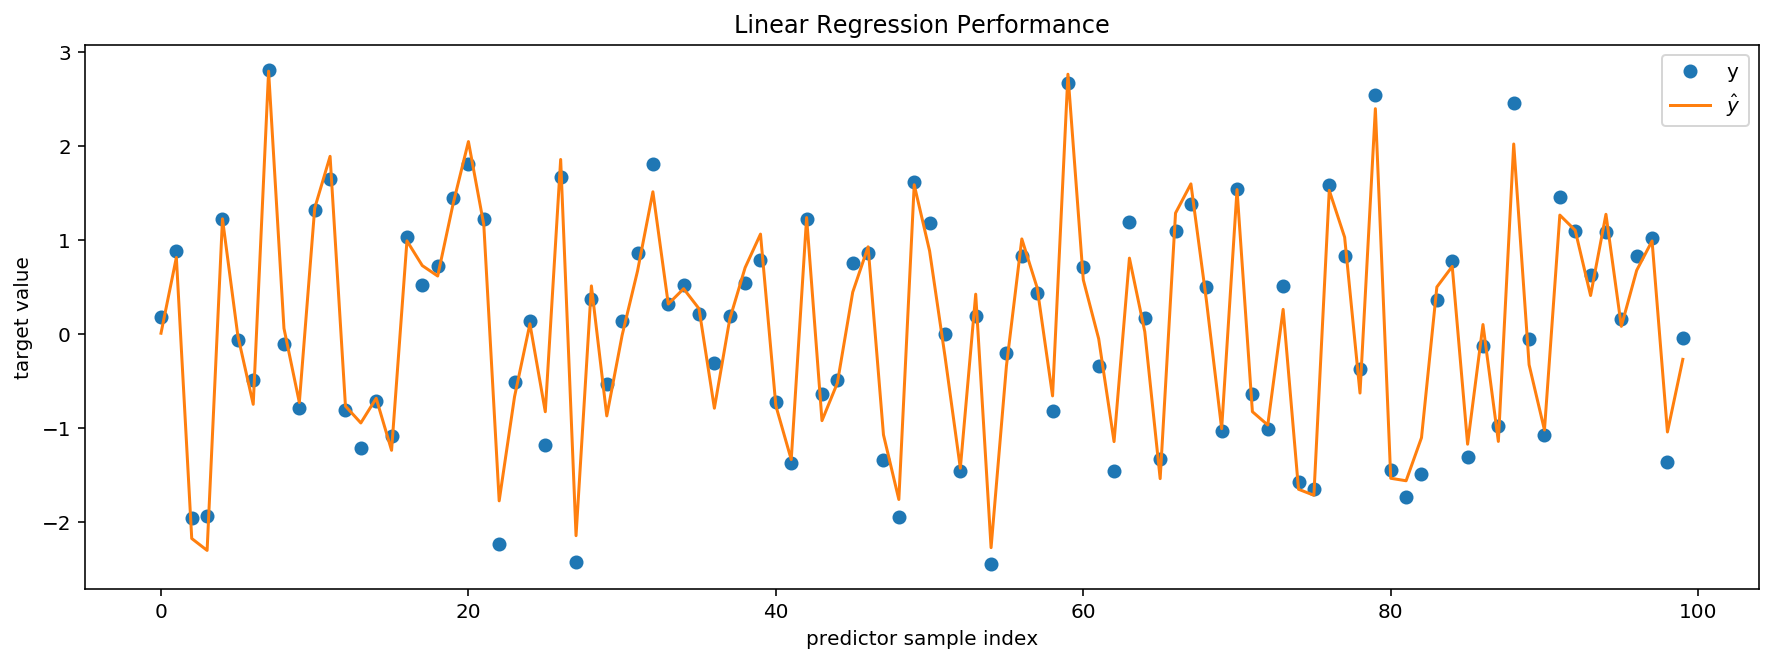

In [17]:
def plot_regression_performance(predictor_indices, targets, regressed_targets):

    plt.figure()

    # make it wide to see the timeseries more easily
    plt.rcParams['figure.figsize'] = [15, 5]
    plt.plot(predictor_indices, targets, 'o', label=r'y')
    plt.plot(predictor_indices, regressed_targets, '-', label=r'$\hat{y}$')

    plt.legend()
    plt.title('Linear Regression Performance')
    plt.xlabel('predictor sample index');
    plt.ylabel('target value');

predictor_indices = range(0, numExamples)
plot_regression_performance(predictor_indices, targets, regressed_targets)

Here we investigate the loss term as a function of each predictor. It is as expected, with the loss generally being quite low, except for some outliers that don't fit the linear model well.

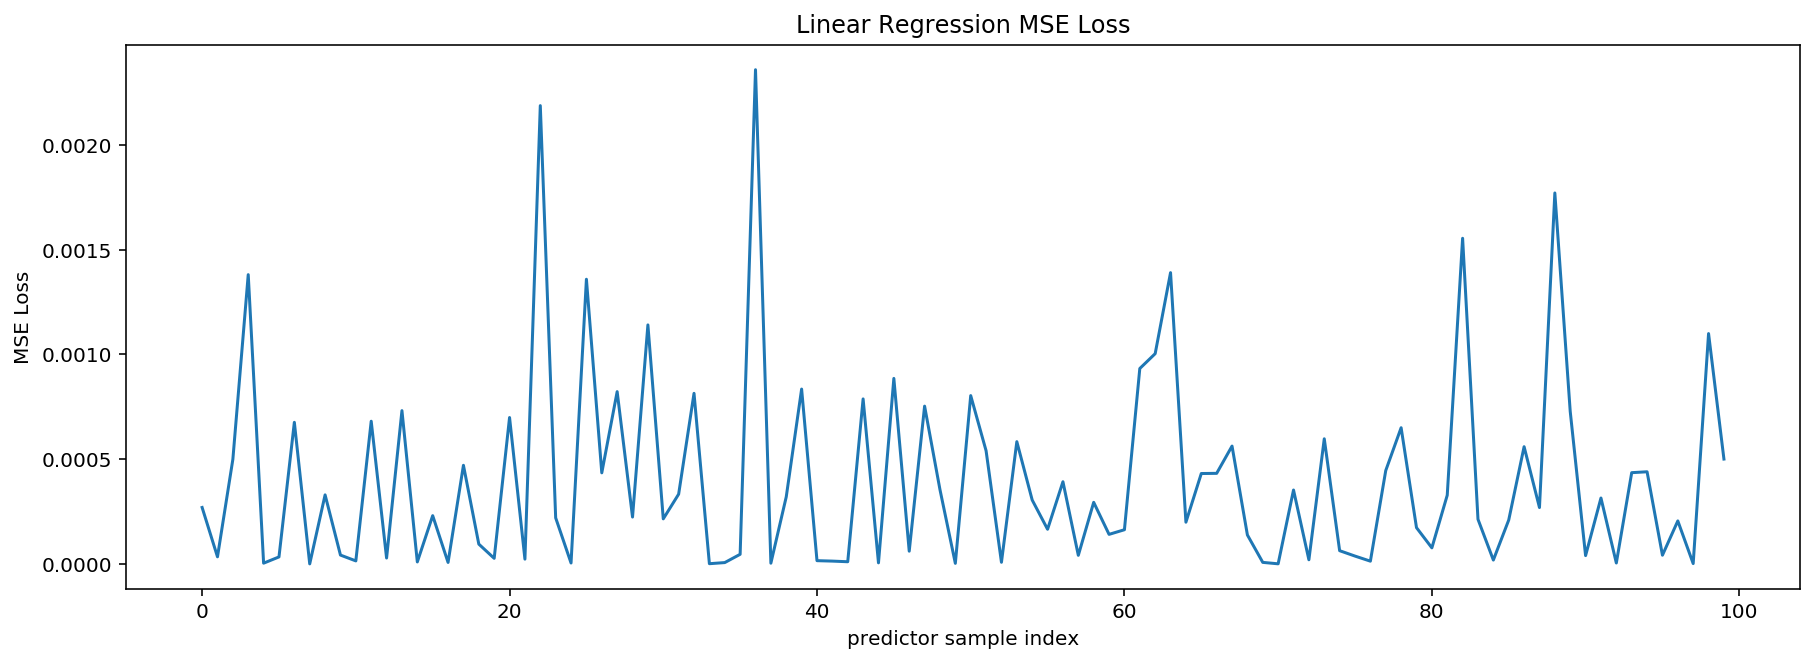

In [5]:
def plot_loss(indices, lossData, xlabel, ylabel, **kwargs):
    
    plt.figure()
    
    # make it wide to see the timeseries more easily
    plt.rcParams['figure.figsize'] = [15, 5]
    
    for loss in lossData:
        plt.plot(indices, loss, '-')
    
    if 'title' in kwargs:
        plt.title(kwargs['title'])
    else:
        plt.title('Linear Regression MSE Loss')
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    
    if 'legendStrings' in kwargs:
        plt.legend(kwargs['legendStrings'])

loss = computePointwiseQuadraticLoss(targets, regressed_targets)
plot_loss(predictor_indices, [loss],
          xlabel='predictor sample index',
          ylabel='MSE Loss')

### (B) What function or method did you use to find the least-squares solution?

The least-squares solution is the result of optimizing:

\begin{equation*}
X \cdot \mathbf{w} = Y
\end{equation*}

where $\mathbf{\hat{w}}$ is the estimated weight vector, $Y$ is the target vector, and $\hat{Y}$ is the regressed target vector. We optimize our quadratic loss to find $\mathbf{\hat{w}}$:
\begin{align*}
\mathbf{\hat{w}} &= \mathbf{w} \mid (Y - \hat{Y})^T \cdot (Y - \hat{Y}) = 0 \\
                 &= \mathbf{w} \mid (Y - X \cdot \mathbf{w})^T \cdot (Y - X \cdot \mathbf{w}) = 0 \\
\end{align*}


The solution, assuming a linearly independent columns of $X$, can be robustly computed with the Moore-Penrose psuedoinverse of the predictor matrix $X$:

\begin{equation*}
X^{+}=\left(X^{T} X\right)^{-1} X^T
\end{equation*}

Thus, the loss-minimizing weight vector $\mathbf{\hat{w}}$ is computed as:
\begin{equation*}
\mathbf{\hat{w}} = X^{+} Y
\end{equation*}


## Part 2
*Implement linear regression of y on X via first-order optimization of the least-squares objective. Write a program that determines the coefficients {w1,w2,b}. Implement stochastic gradient descent, batch gradient descent, and mini-batch gradient descent. You will need to experiment with updating rules, step sizes (i.e. learning rates), stopping criteria, etc. Experiment to find settings that lead to solutions with the fewest number of sweeps through the data.*


*Complete the following functions below and use them to answer questions (A), (B) and (C). You may find the shuffle function from scikit-learn useful.*

*Use the following hyperparameters:*

`Learning rates = [0.001, 0.05, 0.01, 0.05, 0.1, 0.3]`

`MaxIter = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]`

**Note:** *Please do not change the interface of the given functions.*


In [6]:
from sklearn.utils import shuffle

def compute_MSE_loss(y, y_hat):
    """
    Computes the total MSE loss for across all y-y_hat pairs
    
    linear regression is typically formulated assuming an MSE loss
    
    Parameters
    ----------
    y : Numpy array of output value 'y' (size : no of examples X 1)
    y_hat : Numpy array of estimated output value (size : no of examples X 1)
    
    Returns
    -------
    loss : scalar MSE loss over the whole data set
    """
    
    N = len(y)

    # here, accounting for the 1 degree of freedom in a linear model with one
    # predictor variable for the computation of Mean-square-error (MSE))
    residuals = (y - y_hat) ** 2
    loss = 1 / (N - 2) * np.sum(residuals)
    
    return loss

def get_batch_indices(curr_idx, batch_size, num_batches, batch_remainder):
    """
    Calculates the mini-batch indices in the larger data set
    
    Parameters
    ----------
    curr_idx : the batch index
    batch_size : the number of examples in each batch
    num_batches : the number of batches to split the total epoch into
    batch_remainder : the number of batches that don't fit into num_batches
                      groups of size batch_size in the full dataset
    
    Returns
    ----------
    a list of indices into the main data set to use in the current batch
    """
    
    startIdx = curr_idx * batch_size
    endIdx = (curr_idx + 1) * batch_size
    
    # may need to make the last batch extra big to handle spillover
    makeLastBatchBigger = False
    if batch_remainder != 0:
        makeLastBatchBigger = True
        
    atLastBatch = curr_idx == (num_batches - 1)
    if atLastBatch and makeLastBatchBigger:
        endIdx += batch_remainder

    batchIndices = range(startIdx, endIdx)
    
    return batchIndices

def least_squares_loss_gradient(X, y, w):
    """
    Calculates the gradient w.r.t. w of the LLS quadratic loss function
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    
    Returns
    -------
    scalar gradient of the loss w.r.t. w at the given X, y
    """

    return 2 * X.T @ (X @ w - y)

def online_epoch(X, y, w, alpha, *batch_size):
    """
    One epoch of stochastic gradient descent (i.e. one sweep of the dataset).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    alpha : Learning rate
    batch_size : number of examples in a batch (unused, just for interface)
    
    Returns
    -------
    Coefficients of the model (after updating), loss after epoch
    """
    
    return mini_batch_update(X, y, w, alpha, batch_size=1)

def batch_update(X, y, w, alpha, *batch_size):
    """
    One iteration of full-batch gradient descent.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    alpha : Learning rate
    batch_size : number of examples in a batch (unused, just for interface)
    
    Returns
    -------
    Coefficients of the model (after updating), loss after epoch
    """
    
    N = len(y)
    return mini_batch_update(X, y, w, alpha, batch_size=N)

def mini_batch_update(X, y, w, alpha, batch_size):
    """
    One epoch of mini-batch SGD over the entire dataset (i.e. one sweep of
    the dataset).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    alpha : Learning rate
    batch_size : size of the batch for gradient update
    
    Returns
    -------
    Coefficients of the model (after updating), loss after epoch
    """
    
    N = len(y)
    if batch_size > N:
        msg = 'batch size: ' + str(batch_size) + ' cannot be larger than' + \
              ' the number of examples: ' + str(N)
        raise ValueError(msg)

    numBatches, remainder = divmod(N, batch_size)

    for i in range(numBatches):
        
        # need to shuffle the features each epoch for SGD
        X, y = shuffle(X, y)
        batchIndices = get_batch_indices(i, batch_size,
                                         numBatches, remainder)
        features = X[batchIndices, :]
        targets = y[batchIndices]
        
        # perform the gradient descent update step
        grad_L = least_squares_loss_gradient(features, targets, w)
        w -= alpha * grad_L
        loss = compute_MSE_loss(y, X @ w)
        
    return w, loss

def least_squares_grad_desc(X, y, maxIter, alpha, update, **kwargs):
    """
    Implements least squares with gradient descent.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    maxIter : Maximum number of iterations allowed
    alpha : Learning rate
    update : update function to utilize (one of online, batch, mini-batch)
    kwargs : includes optional batch size - number of examples in a batch
                            (only useful when update = mini_batch_update)
    
    Returns
    -------
    Coefficients of the model (after updating)
    
    Note : *batch_size is an optional argument and only to be used when
           doing mini-batch Gradient Descent 
    """
    
    # define a loss tolerance as an additional termination condition
    lossRelTol = 1e-6
    loss = np.inf
    lossRelDiff = np.inf
    
    # as we want to learn the bias term as well, need to augment our feature
    # matrix
    X_b = getFeaturesWithBias(X)

    # the only difference between SGD, mini-batch, and full batch grad
    # descent is batch sizes
    N = len(y)
    updateFunctionMapping = {'online': online_epoch,
                             'mini-batch': mini_batch_update,
                             'batch': batch_update}
    updateFunction = updateFunctionMapping[update]
    
    if 'batch_size' in kwargs:
        batch_size = kwargs['batch_size']
    else:
        batch_size = 10
    
    # initialize gradient descent with weights all being 0
    w = np.array([0.0, 0.0, 0.0]).reshape((3, 1))
    numEpochs = 0
    lossPerEpoch = []
    while (numEpochs < maxIter) and (lossRelDiff > lossRelTol):

        w, newLoss = updateFunction(X_b, y, w, alpha, batch_size)

        lossRelDiff = np.abs(loss - newLoss)
        loss = newLoss
        lossPerEpoch.append(loss)
        
        # slow down printing of loss
        if (numEpochs % 100) == 0:
            print('Epoch: ', numEpochs, 'Loss: ', loss)

        numEpochs += 1
    
    print('Max Epochs: ', numEpochs, 'Min Loss: ', loss)
        
    return w, lossPerEpoch

(A) Report the values of $w_1$, $w_2$, and $b$. 

In [7]:
# update options are:
#     - 'online'
#     - 'mini-batch'
#     - 'batch'
weights, lossPerEpoch = least_squares_grad_desc(predictors, targets,
                                                maxIter=1e3, alpha=0.01,
                                                update='mini-batch',
                                                batch_size=10)
epoch_indices = range(0, len(lossPerEpoch))

regressed_targets = getFeaturesWithBias(predictors) @ weights
print('w_1:', weights[0])
print('w_2:', weights[1])
print('b:', weights[2])

Epoch:  0 Loss:  1.2460606286988651
Epoch:  100 Loss:  0.0402896051330315
Max Epochs:  107 Min Loss:  0.040341341788431344
w_1: [-2.0372031]
w_2: [3.9789449]
b: [-0.92883046]


(B) *What settings worked well for you:  online vs. batch vs. minibatch? What step size? How did you decide to terminate?*

The best settings I found were:
* `update`: `'minibatch'`
* `alpha`: 0.01
* `maxIter`: 1000
* `relTol`: 1e-6

These settings were empirically determined by empirical optimization. Raising `maxIter` much more than 1000 would result in the loss being unchanged for almost the entire calculation. Thus, the relative tolerance was implemented to stop the iteration early, once the loss between successive gradient descent iterations changed by less than `relTol`. Thus, the gradient descent typically finished before completing `maxIter` epochs. 

I found that without gradient momentum, making `alpha` smaller than 0.01 caused extremely slow convergence, except for the `batch` update, which required about an order of magnitude smaller learning rate.  

The selection of `mini-batch` made sense, as the data was found to fit a linear model quite well, so `online` and `mini-batch` both perform much better than `batch`, as the statistics are captured by small subsets of the data (as seen in the loss convergence plot below). The selection of `mini-batch` over `online` was done, as while `online` typically converged in fewer epochs, its poor per-epoch computation time (due to the large number of gradient evaluations) made it take slightly more time to converge to the loss tolerance.

Epoch:  0 Loss:  1.1076776102445716
Max Epochs:  100 Min Loss:  0.040247360299446575
Epoch:  0 Loss:  1.4351012327555464
Max Epochs:  100 Min Loss:  0.13854167138443022
Epoch:  0 Loss:  1.0994042694717765
Max Epochs:  100 Min Loss:  0.040548638708831825


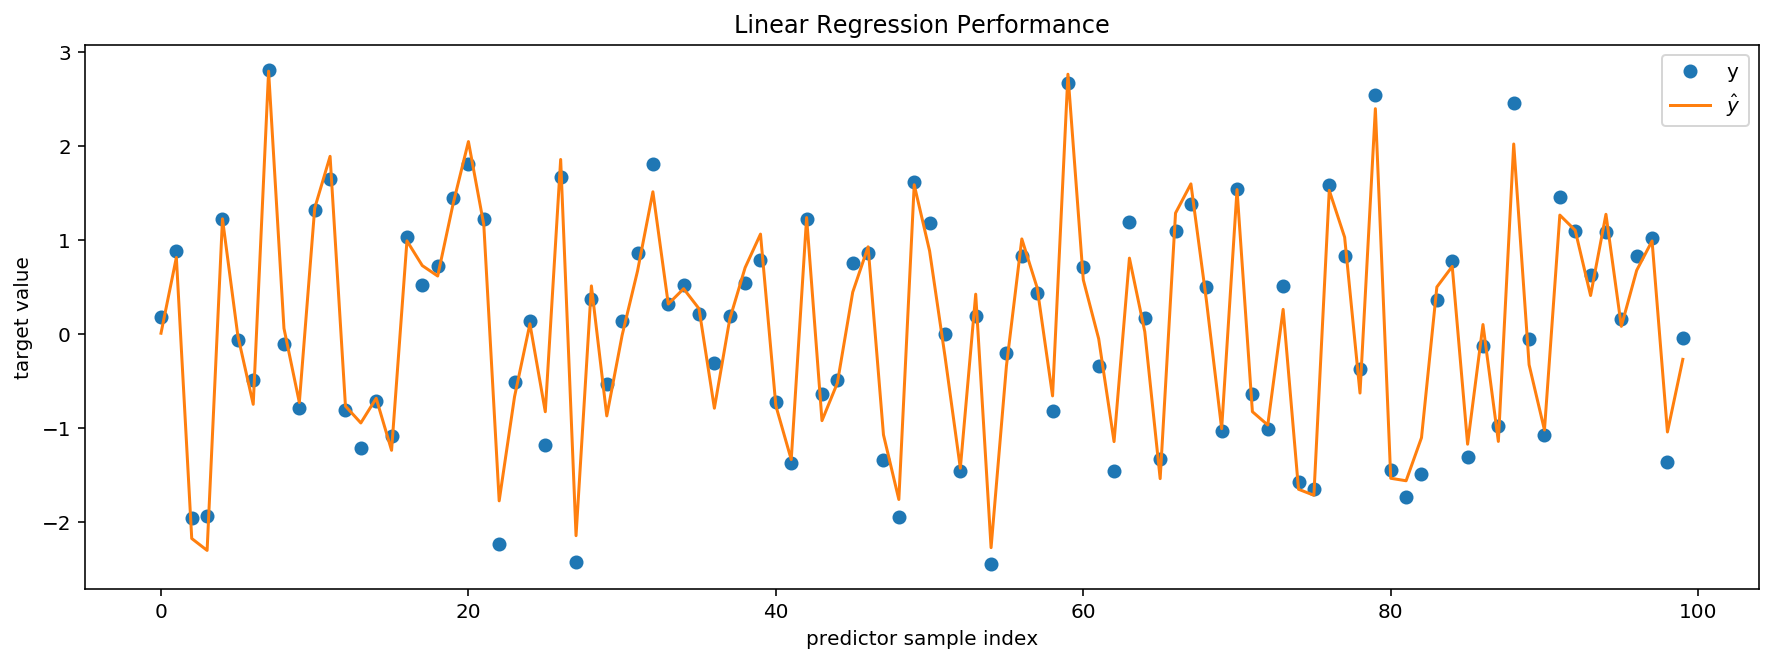

In [8]:
maxEpochs = 100

weights, lossPerEpoch = least_squares_grad_desc(predictors, targets,
                                                maxIter=maxEpochs, alpha=0.01,
                                                update='online',
                                                batch_size=10)
loss_SGD = lossPerEpoch

weights, lossPerEpoch = least_squares_grad_desc(predictors, targets,
                                                maxIter=maxEpochs, alpha=0.001,
                                                update='batch',
                                                batch_size=10)
loss_batch = lossPerEpoch

weights, lossPerEpoch = least_squares_grad_desc(predictors, targets,
                                                maxIter=maxEpochs, alpha=0.01,
                                                update='mini-batch',
                                                batch_size=10)
loss_miniBatch = lossPerEpoch

plot_regression_performance(predictor_indices, targets, regressed_targets)

(C) Make a graph of error on the entire data set as a function of epoch. An epoch is a complete sweep through all the data (which is one iteration for full-batch gradient descent).

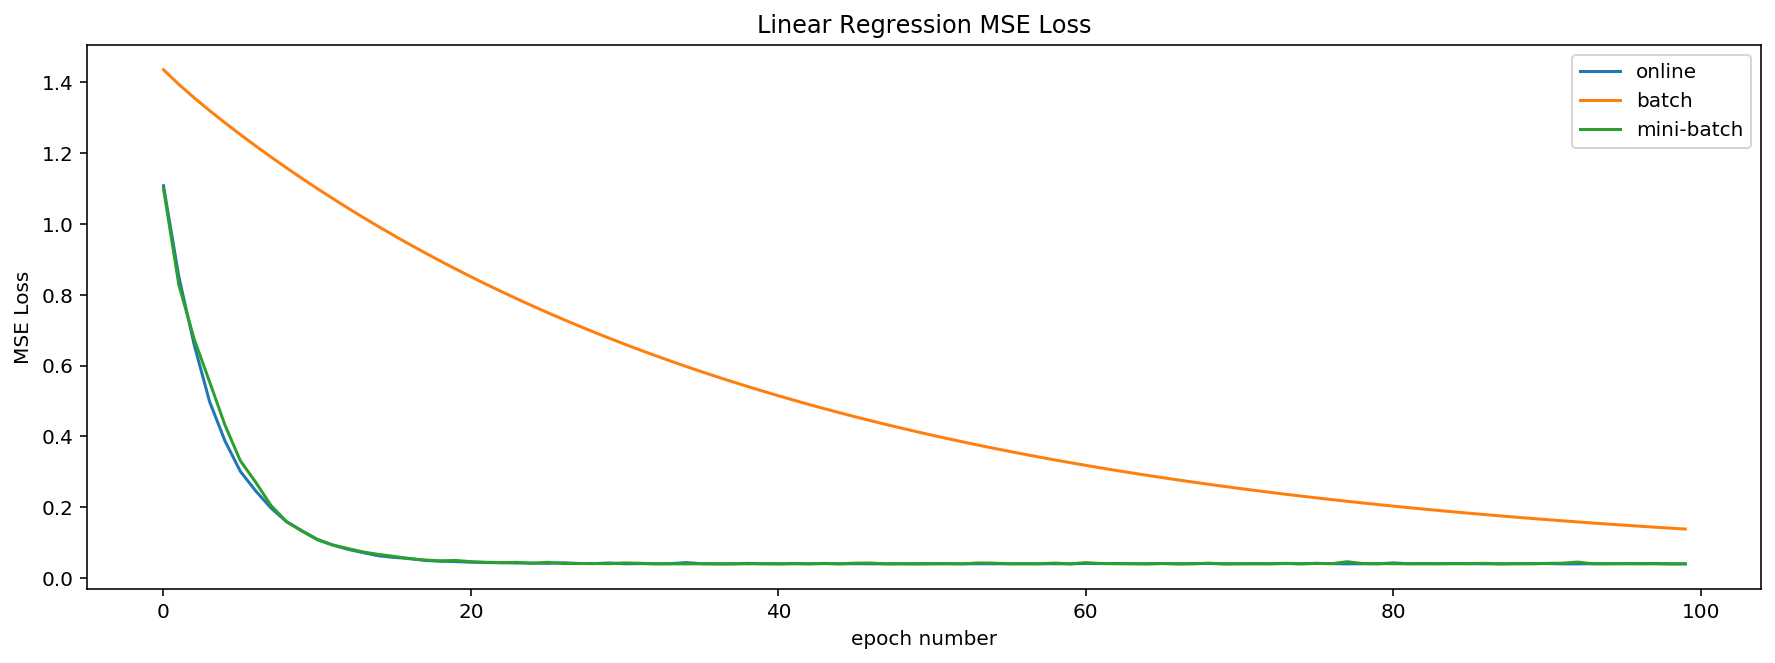

In [9]:
test_epoch_indices = range(0, len(lossPerEpoch))
plot_loss(test_epoch_indices, [loss_SGD, loss_batch, loss_miniBatch],
          xlabel='epoch number',
          ylabel='MSE Loss',
          legendStrings=('online', 'batch', 'mini-batch'))

## Part 3

The data set from a regression problem can be converted into a classification problem simply by using the sign of (+ or -) as representing one of two classes. In the data set used in Part 1 and 2, you'll see the variable z that represents this binary (0 or 1) class.

Use the perceptron learning rule to solve for the coefficients {$w_1$, $w_2$, $b$} of this classification problem.   

Two warnings: First, your solution to Part 3 should require only a few lines of code changed from the code you wrote for Part 2. Second, the Perceptron algorithm will not converge if there is no exact solution to the training data. It will jitter among coefficients that all yield roughly equally good solutions.

Complete the following functions below and use them to answer questions (A) and (B). 

**Note:** Please do not change the interface of the given functions.

In [10]:
def perceptron_update(X, y, w, alpha):
    """
    One epoch of Perceptron updates (full sweep of the dataset).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    alpha : Learning rate
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    incorrect : Incorrectly classified examples
                (tuple of features, predicted label)
    accuracy: ratio of correctly classified to total examples
    """
    
    N = len(y)
    numberClassifiedRight = N
    incorrect = []
    
    for i in range(N):
        
        curr_x = X[i, :].reshape((-1, 1))
        curr_y = y[i]
        y_predicted = np.sign(w.T @ curr_x)
        
        # use perceptron update rule
        if curr_y != y_predicted:

            w += alpha * curr_y * curr_x

            numberClassifiedRight -= 1
            incorrect.append((curr_x, y_predicted))
        
    accuracy = numberClassifiedRight / N

    return w, incorrect, accuracy

def perceptron(X, y, maxIter, alpha):
    """
    Implements the Perceptron algorithm.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    maxIter : The maximum number of iterations allowed 
    alpha : Learning Rate
    
    Returns
    -------
    w : Coefficients of the classifier
    incorrect : Incorrectly classified examples on termination
    accuracyPerEpoch : array-like of best accuracy each epoch
    """
    
    # as we want to learn the bias term as well, need to augment our feature
    # matrix
    X_b = getFeaturesWithBias(X)

    N = len(y)

    # initialize gradient descent with weights all being 0
    w = np.array([0.0, 0.0, 0.0]).reshape((3, 1))
    numEpochs = 0
    accuracyPerEpoch = []
    maxAccuracy = 0
    best_weights = w
    while (numEpochs < maxIter):

        w, incorrect, accuracy = perceptron_update(X_b, y, w, alpha)
        accuracyPerEpoch.append(accuracy)
        
#         if accuracy > maxAccuracy:
#             maxAccuracy = accuracy
#             best_weights = w
        maxAccuracy = accuracy
        if accuracy == 1:
            break
        
        # slow down printing of loss
        if (numEpochs % 100) == 0:
            print('Epoch: ', numEpochs, 'accuracy: ', accuracy)
        
        numEpochs += 1
    
    print('Max Epochs: ', numEpochs, 'Max Accuracy: ', maxAccuracy)
        
    return best_weights, incorrect, accuracyPerEpoch

(A) Report the values of coefficients $w_1$, $w_2$, and $b$.

In [11]:
# need negative classes to be -1
perceptron_labels = [-1 if label == 0 else 1 for label in target_class_labels]

maxIter = 1e4
(weights,
 incorrect,
 accuracyPerEpoch) = perceptron(predictors, perceptron_labels,
                                maxIter=maxIter, alpha=1.0)

print('w_1:', weights[0])
print('w_2:', weights[1])
print('b:', weights[2])

Epoch:  0 accuracy:  0.76
Epoch:  100 accuracy:  0.94
Epoch:  200 accuracy:  0.94
Epoch:  300 accuracy:  0.92
Epoch:  400 accuracy:  0.94
Epoch:  500 accuracy:  0.92
Epoch:  600 accuracy:  0.92
Epoch:  700 accuracy:  0.94
Epoch:  800 accuracy:  0.92
Epoch:  900 accuracy:  0.94
Epoch:  1000 accuracy:  0.92
Epoch:  1100 accuracy:  0.94
Epoch:  1200 accuracy:  0.92
Epoch:  1300 accuracy:  0.92
Epoch:  1400 accuracy:  0.95
Epoch:  1500 accuracy:  0.95
Epoch:  1600 accuracy:  0.94
Epoch:  1700 accuracy:  0.94
Epoch:  1800 accuracy:  0.95
Epoch:  1900 accuracy:  0.95
Epoch:  2000 accuracy:  0.94
Epoch:  2100 accuracy:  0.95
Epoch:  2200 accuracy:  0.95
Epoch:  2300 accuracy:  0.92
Epoch:  2400 accuracy:  0.94
Epoch:  2500 accuracy:  0.95
Epoch:  2600 accuracy:  0.92
Epoch:  2700 accuracy:  0.94
Epoch:  2800 accuracy:  0.95
Epoch:  2900 accuracy:  0.92
Epoch:  3000 accuracy:  0.95
Epoch:  3100 accuracy:  0.92
Epoch:  3200 accuracy:  0.92
Epoch:  3300 accuracy:  0.95
Epoch:  3400 accuracy:  0.

$w_1 = -23.0966$ 

$w_2 = 38.8621$

$b = -6$

(B) Make a graph of the accuracy (% correct classification) on the training set as a function of epoch.

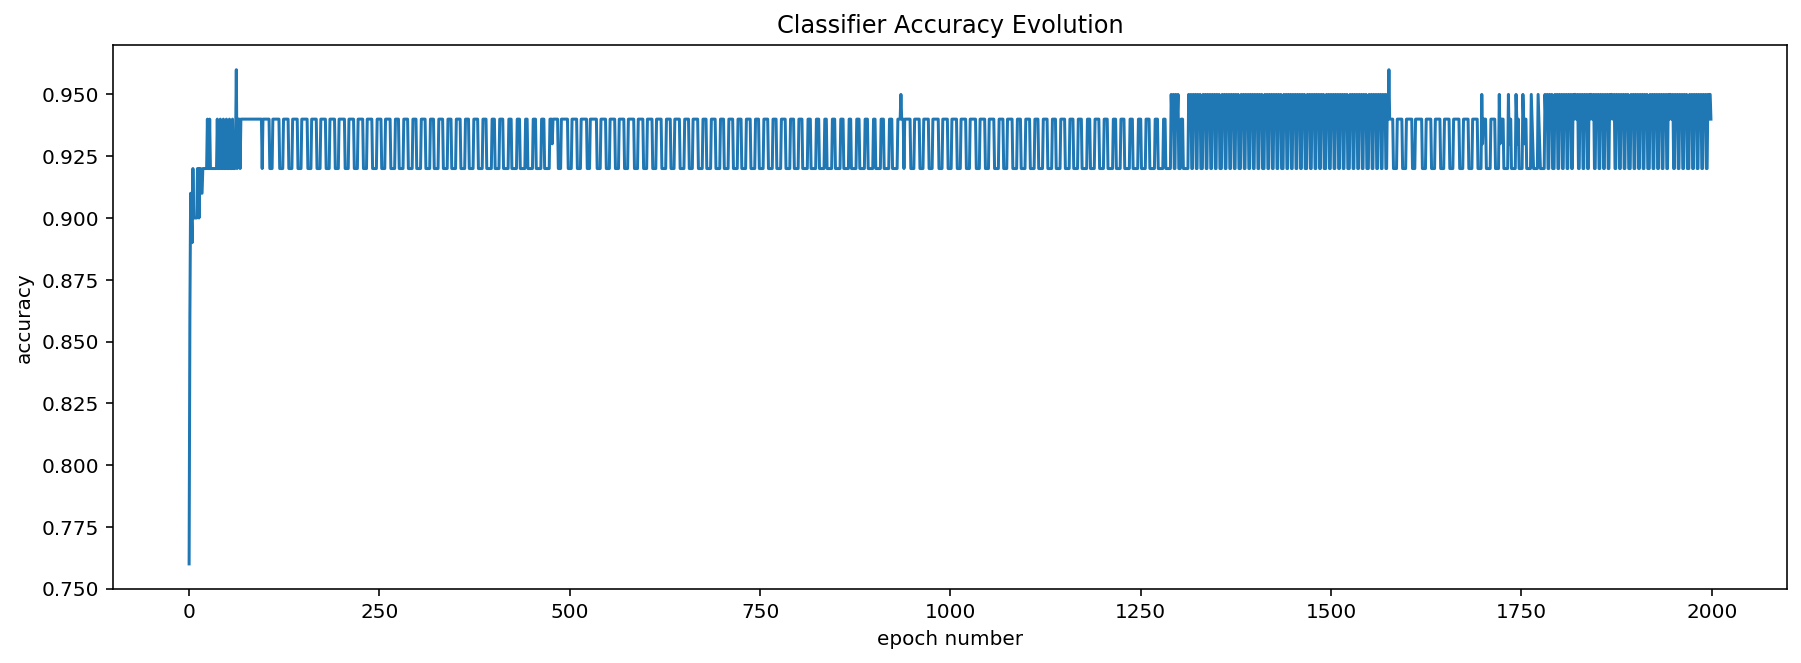

In [12]:
# if lots of epochs were used, only use part of them
maxEpochsToPlot = 500
if maxIter > maxEpochsToPlot:
    maxIter = maxEpochsToPlot
    
maxIter = int(maxIter)
test_epoch_indices = range(maxIter)

plot_loss(test_epoch_indices, [accuracyPerEpoch[0:maxIter]],
          xlabel='epoch number',
          ylabel='accuracy',
          title='Classifier Accuracy Evolution')

## Part 4

In machine learning, we really want to train a model based on some data and then expect the model to do well on "out of sample" data. Try this with the code you wrote for Part 3:  Train the model on the first {5, 10, 25, 50, 75} examples in the data set and test the model on the final 25 examples.

Complete the following function below and use it to answer (A). 

**Note:** Please do not change the interface of the given function.

In [13]:
def classify(X, y, w):
    """
    Use this function to classify examples in the test set
    
    Parameters
    ----------
    X : Test set features
    y : Test set labels
    w : Perceptron coefficients
    
    Returns
    -------
    accuracy: ratio of correctly classified to total examples
    """
    
    N = len(y)
    numberClassifiedRight = N
    
    # as we want to learn the bias term as well, need to augment our feature
    # matrix
    X_b = getFeaturesWithBias(X)
    
    for i in range(N):
        
        curr_x = X_b[i, :].reshape((-1, 1))
        curr_y = y[i]

        y_predicted = np.sign(w.T @ curr_x)
        if curr_y != y_predicted:
            numberClassifiedRight -= 1

    accuracy = numberClassifiedRight / N
    
    return accuracy

Now, we will vary the size of the training set and collect the accuracies of the models associated with each of these training-test splits and save the test accuracy of the model to test model generalization.

In [14]:
def studyPerceptronPerformance(predictors, labels,
                               trainSetSizes, testSetSize, maxIter, alpha):
    """
    Compares the generalization performance of the Perceptron algorithm with
    different training-test splits
    
    Parameters
    ----------
    predictors : NumPy array of features (size : no of examples X features)
    labels : Numpy array of class labels (size : no of examples X 1)
    trainSetSizes : list of number of training examples for training perceptron
    testSetSize : number of examples from the full dataset to use in the test
                  set. Test set is indexed from the END of the full dataset
    maxIter : The maximum number of iterations allowed 
    alpha : Learning Rate
    
    Returns
    -------
    w : Coefficients of the classifier
    incorrect : Incorrectly classified examples on termination
    accuracyPerEpoch : array-like of best accuracy each epoch
    """

    N = len(perceptron_labels)
    testSetPredictors = predictors[N - testSetSize:, :]
    testSetLabels = perceptron_labels[N - testSetSize:]

    testSetAccuracies = []
    for trainSetSize in trainSetSizes:

        # training the perceptron
        trainSetPredictors = predictors[0:trainSetSize, :]
        trainSetLabels = perceptron_labels[0:trainSetSize:]

        (weights, _, _) = perceptron(trainSetPredictors, trainSetLabels,
                                     maxIter=maxIter, alpha=alpha)

        # testing the perceptron
        accuracy = classify(testSetPredictors, testSetLabels, weights)
        testSetAccuracies.append(accuracy)
        print('test accuracy:', accuracy)
        
    return testSetAccuracies

trainSetSizes = [5, 10, 25, 50, 75]
testSetAccuracies = studyPerceptronPerformance(predictors=predictors,
                                               labels=perceptron_labels,
                                               trainSetSizes=trainSetSizes,
                                               testSetSize=25,
                                               maxIter=100, alpha=1.0)

Epoch:  0 accuracy:  0.4
Max Epochs:  2 Max Accuracy:  1.0
test accuracy: 0.96
Epoch:  0 accuracy:  0.6
Max Epochs:  4 Max Accuracy:  1.0
test accuracy: 0.64
Epoch:  0 accuracy:  0.68
Max Epochs:  15 Max Accuracy:  1.0
test accuracy: 0.96
Epoch:  0 accuracy:  0.68
Max Epochs:  16 Max Accuracy:  1.0
test accuracy: 0.96
Epoch:  0 accuracy:  0.72
Max Epochs:  100 Max Accuracy:  0.92
test accuracy: 0.96


*How does performance on the test set vary with the amount of training data? Make a bar graph showing performance for each of the different training set sizes.*

Surprisingly, the performance of the classifier on the test set (i.e. generalization error) seems to be fairly independent of the training. This is again due to the data following a linear model quite well, allowing the learner to generalize well even seeing very few examples of the model. This excellent generalization performance is even more impressive given the complete lack of effort to introduce regularization to our classifier.

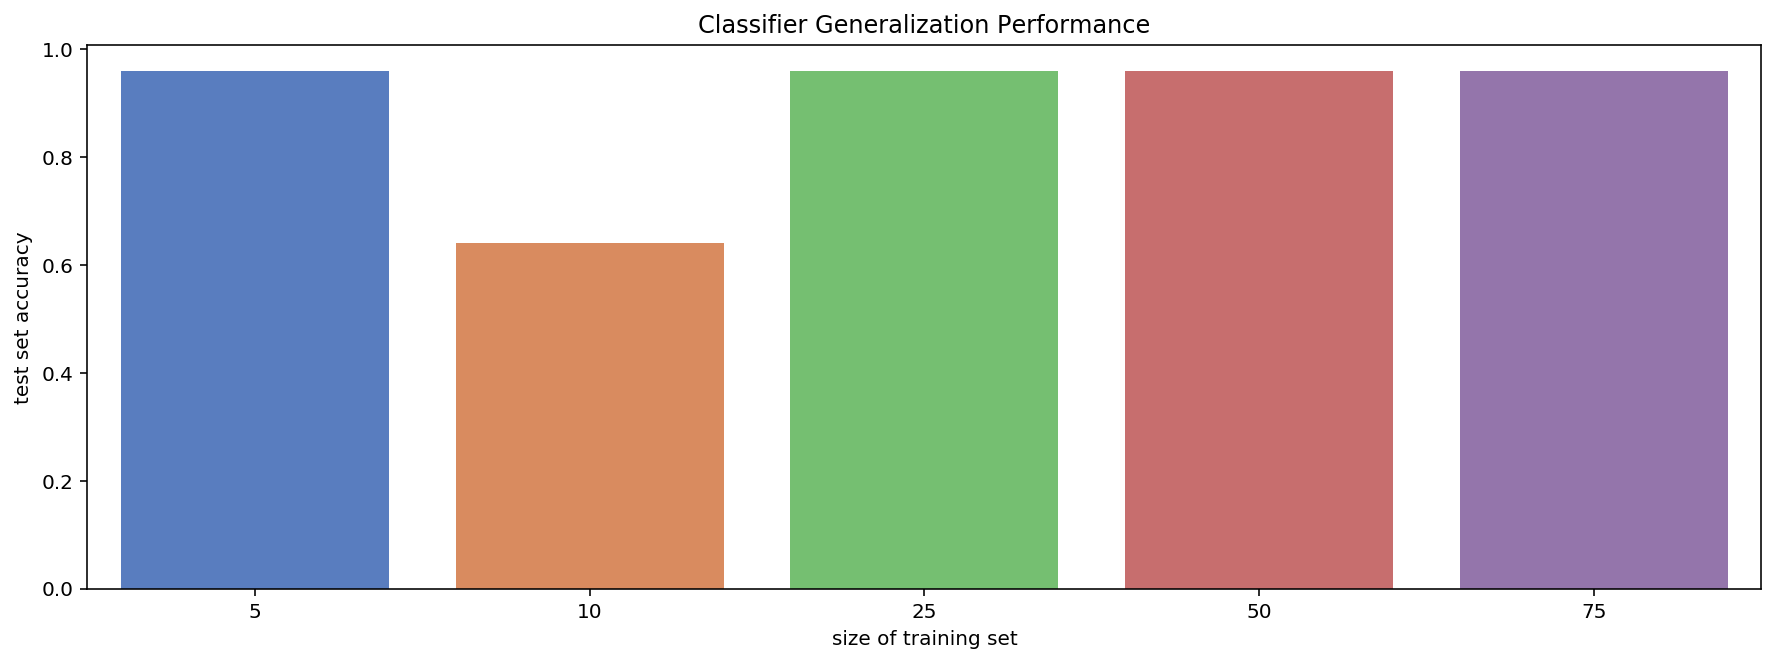

In [15]:
def plotGeneralizationPerformance(trainSetSizes, testSetAccuracies):
    dict = {'test set accuracy': testSetAccuracies,
        'size of training set': trainSetSizes}
    df = pd.DataFrame(dict)

    title = 'Classifier Generalization Performance'
    sns.barplot(x='size of training set',
                y='test set accuracy',
                data=df, palette="muted").set_title(title);

plotGeneralizationPerformance(trainSetSizes, testSetAccuracies)

However, we can see that there are some noisy examples in the data set, as increasing the size of the test set leads to generalization performance more in line with our expectations. Below, we see that the classifier monotonically increases after seeing 10 examples. The first 5 examples seem to be more illustrative of the underlying linearly-separable data generating process, while the next 10 or diverge more heavily from this sort of model.

Epoch:  0 accuracy:  0.4
Max Epochs:  2 Max Accuracy:  1.0
test accuracy: 0.86
Epoch:  0 accuracy:  0.3333333333333333
Max Epochs:  3 Max Accuracy:  1.0
test accuracy: 0.64
Epoch:  0 accuracy:  0.42857142857142855
Max Epochs:  3 Max Accuracy:  1.0
test accuracy: 0.64
Epoch:  0 accuracy:  0.5
Max Epochs:  3 Max Accuracy:  1.0
test accuracy: 0.64
Epoch:  0 accuracy:  0.5555555555555556
Max Epochs:  4 Max Accuracy:  1.0
test accuracy: 0.58
Epoch:  0 accuracy:  0.6
Max Epochs:  4 Max Accuracy:  1.0
test accuracy: 0.58
Epoch:  0 accuracy:  0.6
Max Epochs:  5 Max Accuracy:  1.0
test accuracy: 0.72
Epoch:  0 accuracy:  0.65
Max Epochs:  84 Max Accuracy:  1.0
test accuracy: 0.9
Epoch:  0 accuracy:  0.68
Max Epochs:  15 Max Accuracy:  1.0
test accuracy: 0.92
Epoch:  0 accuracy:  0.6666666666666666
Max Epochs:  9 Max Accuracy:  1.0
test accuracy: 0.94
Epoch:  0 accuracy:  0.6857142857142857
Max Epochs:  23 Max Accuracy:  1.0
test accuracy: 0.94
Epoch:  0 accuracy:  0.7
Max Epochs:  22 Max Accura

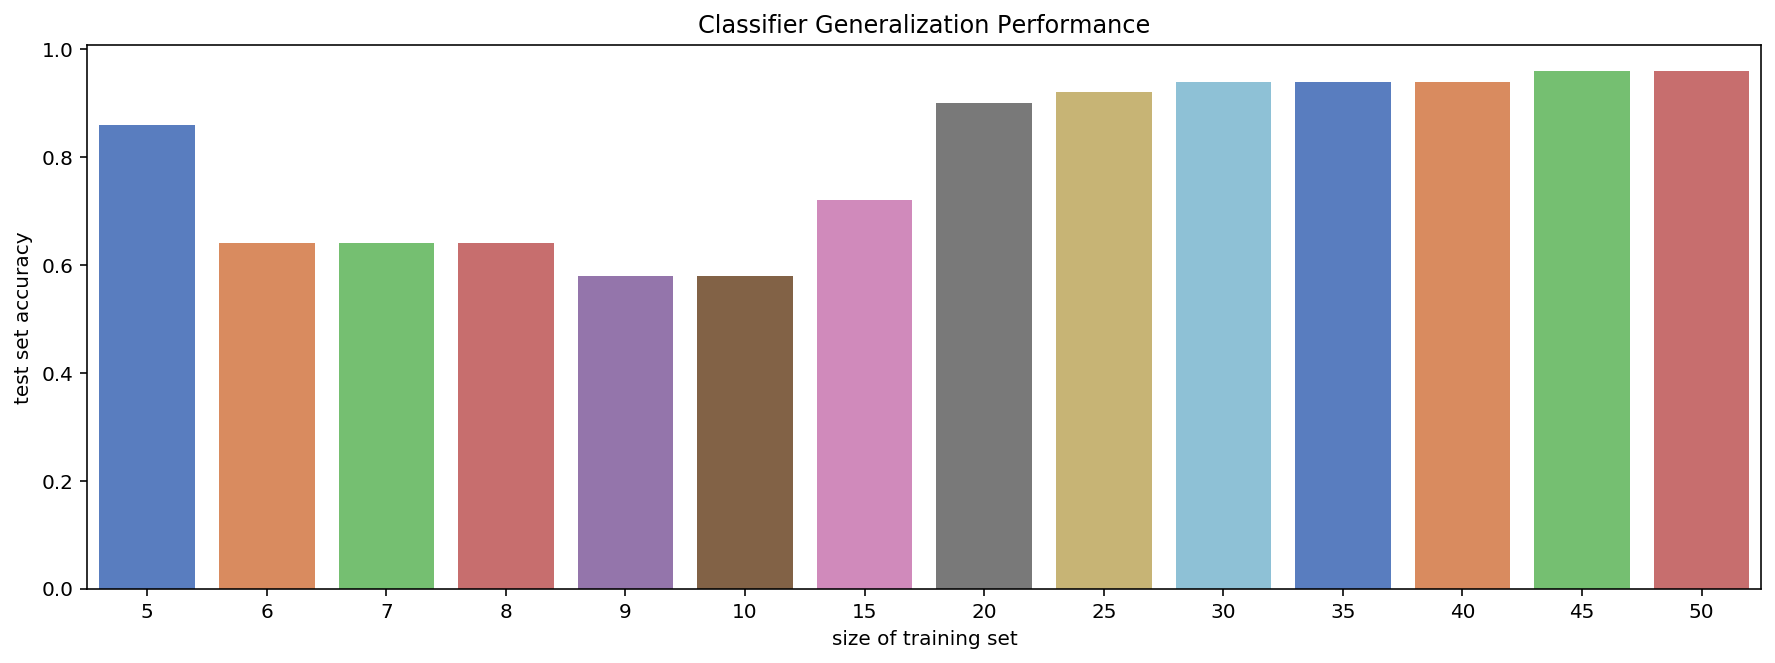

In [16]:
trainSetSizes = [5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]
testSetAccuracies = studyPerceptronPerformance(predictors=predictors,
                                               labels=perceptron_labels,
                                               trainSetSizes=trainSetSizes,
                                               testSetSize=50,
                                               maxIter=100, alpha=1.0)
plotGeneralizationPerformance(trainSetSizes, testSetAccuracies)